In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds_salary=pd.read_csv('Salary_dataset.csv');

In [4]:
ds_salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [50]:
ds_salary.YearsExperience.min(),ds_salary.YearsExperience.max()

(1.2000000000000002, 10.6)

In [7]:
ds_salary.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [57]:
ds_salary=ds_salary.drop(['Unnamed: 0'],axis=1)
x=ds_salary['YearsExperience']
y=ds_salary['Salary']

In [19]:
x=x.to_numpy()
y=y.to_numpy()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [25]:
y_pred=model.predict(x_test.reshape(-1,1))

In [28]:
model.score(x_test.reshape(-1,1),y_test)

0.9574721715261387

In [40]:
from sklearn.metrics import mean_squared_log_error

In [41]:
mean_squared_log_error(y_pred,y_test)

0.004418495906730879

In [42]:
y_pred

array([101530.10941132,  53181.04432672, 112166.90372993, 126671.62325531,
        44478.21261149,  76388.59556733,  74454.63296394,  72520.67036056])

In [43]:
y_test

array([101303.,  56643., 105583., 121873.,  43526.,  83089.,  66030.,
        67939.])

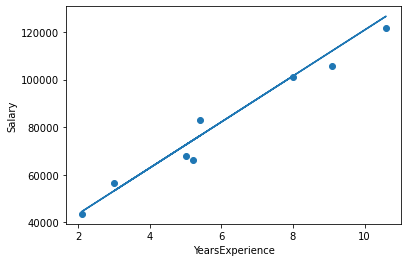

In [47]:
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

### So from above visualisation we can clearly say that our model is predicting pretty good

From above graph, we can say if a person has a experience of:
    2-4 years salary ranges between 40000 to 60000,
    4-6 years salary ranges between 60000 to 80000,
    6-8 years salary ranges between 80000 to 100000,
    8-10 years salary ranges between 100000 to 120000.

If you notice the minimum experience starts from 1.2 and ends at 10.6 so to add them we will bin and find the mean to get average salary of bins

In [84]:
ds_salary['years']=pd.cut(ds_salary['YearsExperience'],[1,3,5,7,9,11],right=False,labels=['1-3 years','3-5 years','5-7 years','7-9 years','9-11 years'],)

In [85]:
df_new_salary=ds_salary[['Salary','years']]

In [86]:
years_grouping=df_new_salary.groupby(['years'])

In [87]:
labels=['1-3 years','3-5 years','5-7 years','7-9 years','9-11 years']
for items in labels:
    years_experience=years_grouping.get_group(items)
    mean=round(years_experience.Salary.mean(),2);
    msg=items+" mean is "+ str(mean);
    print(msg)

1-3 years mean is 41340.0
3-5 years mean is 58704.2
5-7 years mean is 80683.67
7-9 years mean is 105705.5
9-11 years mean is 115890.8


### so the average salary of a person who has 1-3 years is more likely to be rupees 41340, 3-5 years is rupees 58704.2, 5-7 years is rupees 80683.67, 7-9 years is rupees 105705.4 and 9-11 years is rupees 115890.8